<a href="https://colab.research.google.com/github/RajK853/tum-adlr-ss21-11/blob/main/notebook/Demo_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup for Google Colab
The sections below are required to execute this notebook in Google Colab. If you are not executing this notebook in Google colab, you can skip to [here](#Implementation).

In [5]:
%tensorflow_version 2.x

## Cloning the repo
The shell command below clones the git repo if the local repo directory does not exit. Otherwise, it simply pulls the updated version.

In [3]:
%%shell
REPOSRC=https://github.com/RajK853/tum-adlr-ss21-11.git
LOCALREPO=/adlr
 
LOCALREPO_VC_DIR=$LOCALREPO/.git
 
if [ ! -d $LOCALREPO_VC_DIR ]
then
    git clone $REPOSRC $LOCALREPO
else
    cd $LOCALREPO
    git pull $REPOSRC
fi

From https://github.com/RajK853/tum-adlr-ss21-11
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


## Setting the working directory
By default, the working directory is `./notebook/` for Jupyter Lab. Therefore, we set the working directory to that path also in Google Colab so that the later cells is compatible with both Google Colab and Jupyter Lab. 

In [4]:
%cd /adlr/notebook

/adlr/notebook


## Mount Google Drive
Mount your Google drive to access the data set located in your Google drive.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Implementation
The section below works for both Google Colab and Jupyter Notebook.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Change directory to src to import functions from load.py
%cd "../src"
from load import get_values_sql, compressed2img, object2numeric_array

/adlr/src


## Initialize global variables

In [8]:
db_path = r"/content/drive/MyDrive/ADLR Data Set/SingleSphere02.db"   # Path of the data in your local machine

In [9]:
n_voxels = 64
voxel_size = 10 / 64     # in m
extent = [0, 10, 0, 10]  # in m
n_waypoints = 22         # start + 20 inner points + end
n_dim = 2
n_paths_per_world = 1000
path_rows = [0, 1, 1000, 2000, 3500]

## Loading data

In [10]:
worlds = get_values_sql(file=db_path, table='worlds')
obstacle_images = compressed2img(img_cmp=worlds.obst_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
print(f"Obstacle images dimension: {obstacle_images.shape}")

Obstacle images dimension: (5000, 64, 64)


/adlr/src/load.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  value = np.array([np.frombuffer(v, dtype=int) for v in value])


Each world consists of **1000 different path configurations** such that path index 0 - 999 is in world 0, path index 1000 - 1999 is in world 1 etc i.e. $world_i = floor(\frac{path_i}{1000})$

In [11]:
paths = get_values_sql(file=db_path, table='paths', rows=path_rows)
path_images = compressed2img(img_cmp=paths.path_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
start_images = compressed2img(img_cmp=paths.start_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
end_images = compressed2img(img_cmp=paths.end_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)

q_paths = object2numeric_array(paths.q_path.values)
q_paths = q_paths.reshape(-1, n_waypoints, n_dim)

## Plot an example

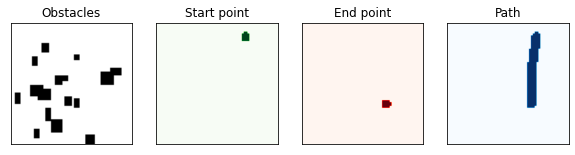

In [15]:
path_i = np.random.choice(path_rows)
i = np.where(path_rows==path_i)[0].item()
world_i = path_i//n_paths_per_world

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
axs[0].imshow(obstacle_images[world_i].T, origin='lower', extent=extent, cmap='binary')
axs[1].imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens')
axs[2].imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds')
axs[3].imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues')
# Set titles and remove x/y ticks
for (ax, title) in zip(axs, ("Obstacles", "Start point", "End point", "Path")) :
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

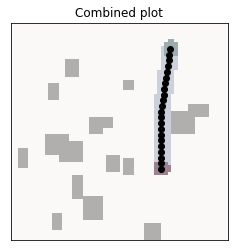

In [16]:
fig, ax = plt.subplots()
ax.imshow(obstacle_images[world_i].T, origin='lower', extent=extent, cmap='binary')
ax.imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens', alpha=0.4)
ax.imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds', alpha=0.4)
ax.imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues', alpha=0.2)
ax.plot(*q_paths[i].T, color='k', marker='o')
plt.title("Combined plot")
plt.xticks([])
plt.yticks([])
plt.show()